In [1]:
pip install flask pandas numpy scikit-learn nltk torch transformers seaborn joblib matplotlib 


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("StudentsPerformance.csv")

# Encode categorical variables
label_enc = LabelEncoder()
data['gender_encoded'] = label_enc.fit_transform(data['gender'])
data['lunch_encoded'] = label_enc.fit_transform(data['lunch'])
data['test_preparation_encoded'] = label_enc.fit_transform(data['test preparation course'])

# Statistical Summary
summary = data.describe()
print("Dataset Statistical Summary:\n", summary)

# High and Low Performers
high_performers = data[(data['math score'] > 85) & (data['reading score'] > 85) & (data['writing score'] > 85)]
low_performers = data[(data['math score'] < 50) & (data['reading score'] < 50) & (data['writing score'] < 50)]
print(f"High Performers Count: {len(high_performers)} - Recommendation: Consider advanced courses.")
print(f"Low Performers Count: {len(low_performers)} - Recommendation: Extra tutoring and study resources.")

# Function to generate graphs
def plot_graph(option):
    plt.figure(figsize=(8, 5))
    if option == "Score Distribution":
        sns.histplot(data[['math score', 'reading score', 'writing score']], kde=True)
        plt.title("Distribution of Scores")
    elif option == "Gender Performance":
        sns.boxplot(x='gender', y='math score', data=data)
        plt.title("Math Score by Gender")
    elif option == "Lunch Effect":
        sns.boxplot(x='lunch', y='math score', data=data)
        plt.title("Effect of Lunch on Math Score")
    plt.show()

# Interactive Widget
dropdown = widgets.Dropdown(
    options=['Score Distribution', 'Gender Performance', 'Lunch Effect'],
    description='Choose Graph:',
    style={'description_width': 'initial'}
)
widgets.interactive(plot_graph, option=dropdown)


Dataset Statistical Summary:
        math score  reading score  writing score  gender_encoded  \
count  1000.00000    1000.000000    1000.000000     1000.000000   
mean     66.08900      69.169000      68.054000        0.482000   
std      15.16308      14.600192      15.195657        0.499926   
min       0.00000      17.000000      10.000000        0.000000   
25%      57.00000      59.000000      57.750000        0.000000   
50%      66.00000      70.000000      69.000000        0.000000   
75%      77.00000      79.000000      79.000000        1.000000   
max     100.00000     100.000000     100.000000        1.000000   

       lunch_encoded  test_preparation_encoded  
count    1000.000000               1000.000000  
mean        0.645000                  0.642000  
std         0.478753                  0.479652  
min         0.000000                  0.000000  
25%         0.000000                  0.000000  
50%         1.000000                  1.000000  
75%         1.000000   

interactive(children=(Dropdown(description='Choose Graph:', options=('Score Distribution', 'Gender Performance…

Dropdown(description='Ask:', options=('improve', 'stress', 'resources', 'health'), value='improve')

Output()

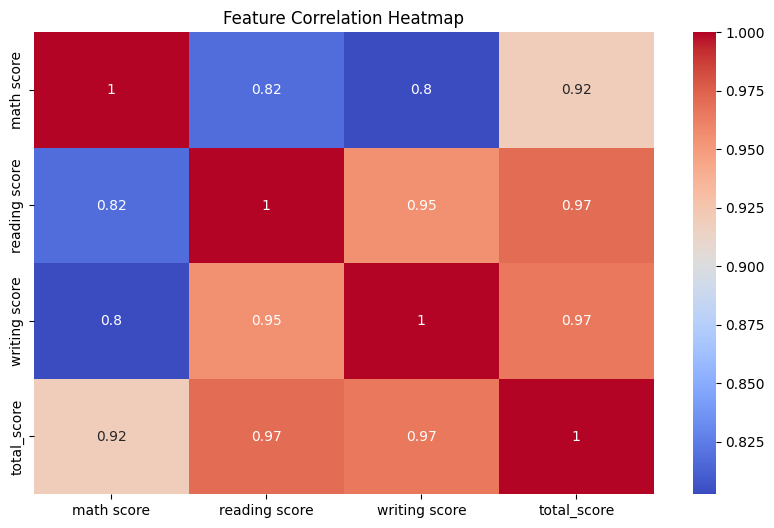

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('StudentsPerformance.csv')

# Feature Engineering
data['total_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data['pass_fail'] = np.where(data['total_score'] >= 50, 'Pass', 'Fail')

# Function to create interactive image cards
def create_card(title, content):
    return f"""
    <div style='border:1px solid #ddd; padding:10px; margin:10px; border-radius:10px; box-shadow: 2px 2px 10px #aaa;'>
        <h3>{title}</h3>
        <p>{content}</p>
    </div>
    """

# Interactive Visualization
def show_plots():
    fig1 = px.histogram(data, x='total_score', color='pass_fail', marginal='box', title='Student Score Distribution')
    fig1.show()
    
    plt.figure(figsize=(10,6))
    sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

# ML Model: Predicting Pass/Fail
X = data[['math score', 'reading score', 'writing score']]
y = data['pass_fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Chatbot for Recommendations
def chatbot(user_input):
    responses = {
        "improve": "Focus on weak subjects, practice consistently, and seek tutoring if needed. Recommended websites: Khan Academy, Coursera. Books: 'Make It Stick' by Peter C. Brown, 'The Art of Learning' by Josh Waitzkin.",
        "stress": "Try mindfulness exercises, schedule breaks, and maintain a healthy sleep routine. Recommended YouTube channels: 'Therapy in a Nutshell', 'Headspace'.",
        "resources": "Check out Coursera, Khan Academy, and recommended books for additional learning. Websites: edX, Udemy. Books: 'Atomic Habits' by James Clear.",
        "health": "Drink enough water, eat balanced meals, and get sufficient sleep for better focus. Foods: Nuts, leafy greens, and omega-3-rich fish help cognitive function."
    }
    return responses.get(user_input.lower(), "I'm here to help! Ask about study tips, stress reduction, or resources.")

# Interactive Chat with Dropdown
options = ["improve", "stress", "resources", "health"]
chat_dropdown = widgets.Dropdown(options=options, description='Ask:')
chat_output = widgets.Output()

def on_chat_select(change):
    with chat_output:
        chat_output.clear_output()
        response = chatbot(change.new)
        display(HTML(create_card("Chatbot Response", response)))

chat_dropdown.observe(on_chat_select, names='value')

# Display UI Elements
display(HTML(create_card("Model Accuracy", f"The model achieved an accuracy of {accuracy:.2f}")))
display(HTML(create_card("Classification Report", f"<pre>{report}</pre>")))
display(chat_dropdown, chat_output)
show_plots()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("StudentsPerformance.csv")

# Encode categorical variables
label_enc = LabelEncoder()
data['gender_encoded'] = label_enc.fit_transform(data['gender'])
data['lunch_encoded'] = label_enc.fit_transform(data['lunch'])
data['test_preparation_encoded'] = label_enc.fit_transform(data['test preparation course'])

# Statistical Summary
summary = data.describe()
print("Dataset Statistical Summary:\n", summary)

# High and Low Performers
high_performers = data[(data['math score'] > 85) & (data['reading score'] > 85) & (data['writing score'] > 85)]
low_performers = data[(data['math score'] < 50) & (data['reading score'] < 50) & (data['writing score'] < 50)]
print(f"High Performers Count: {len(high_performers)} - Recommendation: Consider advanced courses.")
print(f"Low Performers Count: {len(low_performers)} - Recommendation: Extra tutoring and study resources.")

# Pass/Fail Classification
pass_threshold = 50
data['pass_status'] = np.where((data['math score'] >= pass_threshold) & 
                               (data['reading score'] >= pass_threshold) & 
                               (data['writing score'] >= pass_threshold), 'Pass', 'Fail')

# Visualization Functions
def plot_graph(option):
    plt.figure(figsize=(8, 5))
    if option == "Score Distribution":
        sns.histplot(data[['math score', 'reading score', 'writing score']], kde=True)
        plt.title("Distribution of Scores")
    elif option == "Gender Performance":
        sns.boxplot(x='gender', y='math score', data=data)
        plt.title("Math Score by Gender")
    elif option == "Lunch Effect":
        sns.boxplot(x='lunch', y='math score', data=data)
        plt.title("Effect of Lunch on Math Score")
    elif option == "Pass/Fail Distribution":
        sns.countplot(x='pass_status', data=data, palette='coolwarm')
        plt.title("Pass vs Fail Count")
    elif option == "Correlation Heatmap":
        plt.figure(figsize=(10,6))
        sns.heatmap(data[['math score', 'reading score', 'writing score', 'gender_encoded', 'lunch_encoded', 'test_preparation_encoded']].corr(), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
    plt.show()

# Interactive Widget
dropdown = widgets.Dropdown(
    options=['Score Distribution', 'Gender Performance', 'Lunch Effect', 'Pass/Fail Distribution', 'Correlation Heatmap'],
    description='Choose Graph:',
    style={'description_width': 'initial'}
)
display(widgets.interactive(plot_graph, option=dropdown))

# Recommendations Based on Performance
def get_recommendations(row):
    if row['pass_status'] == 'Fail':
        return "Suggested: Khan Academy, Coursera basics, YouTube: CrashCourse"
    elif row['pass_status'] == 'Pass' and row['math score'] > 85:
        return "Suggested: MIT OpenCourseWare, Brilliant.org, YouTube: 3Blue1Brown"
    else:
        return "Suggested: Practice tests, EdX foundation courses, YouTube: Numberphile"

data['recommendations'] = data.apply(get_recommendations, axis=1)
print(data[['math score', 'reading score', 'writing score', 'pass_status', 'recommendations']].head())


Dataset Statistical Summary:
        math score  reading score  writing score  gender_encoded  \
count  1000.00000    1000.000000    1000.000000     1000.000000   
mean     66.08900      69.169000      68.054000        0.482000   
std      15.16308      14.600192      15.195657        0.499926   
min       0.00000      17.000000      10.000000        0.000000   
25%      57.00000      59.000000      57.750000        0.000000   
50%      66.00000      70.000000      69.000000        0.000000   
75%      77.00000      79.000000      79.000000        1.000000   
max     100.00000     100.000000     100.000000        1.000000   

       lunch_encoded  test_preparation_encoded  
count    1000.000000               1000.000000  
mean        0.645000                  0.642000  
std         0.478753                  0.479652  
min         0.000000                  0.000000  
25%         0.000000                  0.000000  
50%         1.000000                  1.000000  
75%         1.000000   

interactive(children=(Dropdown(description='Choose Graph:', options=('Score Distribution', 'Gender Performance…

   math score  reading score  writing score pass_status  \
0          72             72             74        Pass   
1          69             90             88        Pass   
2          90             95             93        Pass   
3          47             57             44        Fail   
4          76             78             75        Pass   

                                     recommendations  
0  Suggested: Practice tests, EdX foundation cour...  
1  Suggested: Practice tests, EdX foundation cour...  
2  Suggested: MIT OpenCourseWare, Brilliant.org, ...  
3  Suggested: Khan Academy, Coursera basics, YouT...  
4  Suggested: Practice tests, EdX foundation cour...  


In [12]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
